# House Price Estimation

This is one of the kaggle competitions.

## Competition Description ([from kaggle web site]((https://www.kaggle.com/c/house-prices-advanced-regression-techniques)))

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Data
The data has been split into two groups:

### **training set (train.csv)**

### **test set (test.csv)**

The *training set* should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The *test set* should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore') 

In [54]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge, RidgeCV
from sklearn import cross_validation

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, Lasso
from sklearn import ensemble, tree, linear_model

## 01. Load Files

In [3]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

### File check...!!

The following tasks can be used for checking...!

`.head()` : partially show

`.shape` : dimension

`.info()` : data type

`.describe()` : count,min,max,25%...

In [4]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [5]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [6]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [7]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

There are A LOT OF columns....!!! Let's see them!

At the first glance, I want to see the distribution of Sale Prices.

### Basic histogram : plt.hist

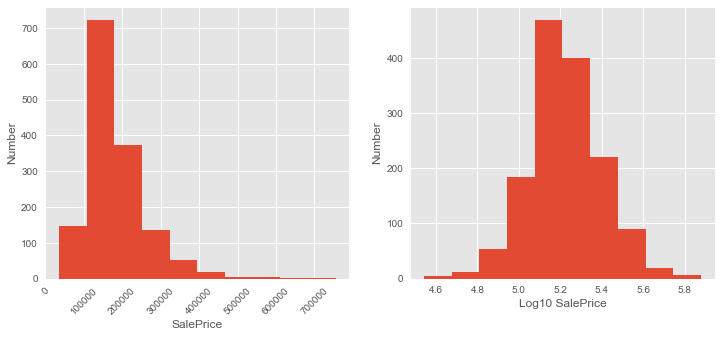

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.hist(train.SalePrice)
plt.xticks(rotation=45)
plt.xlabel("SalePrice")
plt.ylabel("Number")
plt.subplot(122)
plt.hist(np.log10(train.SalePrice))
plt.xlabel("Log10 SalePrice")
plt.ylabel("Number")
plt.show()

I will use log scale of SalePrice because log scale seems to be more reasonable for normal gaussian distribution.

## 02. Correlation Function (sns.heatmap)

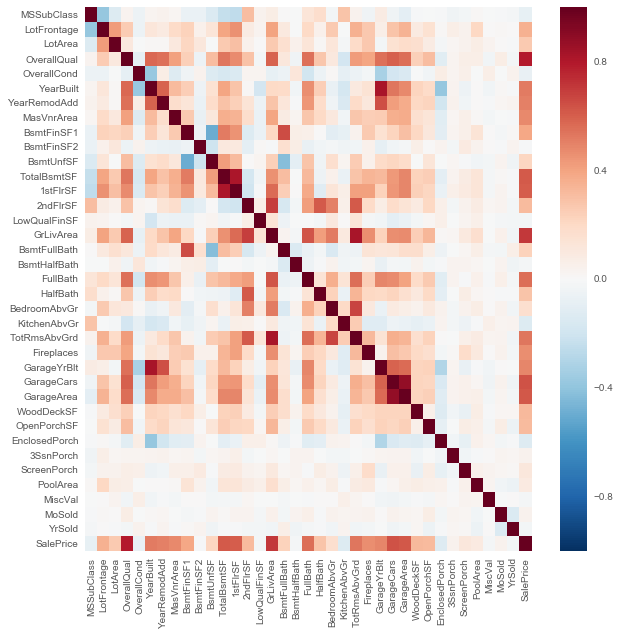

In [11]:
numtrain = train.select_dtypes(include=[np.number])
corr = numtrain.drop(['Id'],axis=1).corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr)

The bottom row indicates how much SalePrice is correlated with other features. It seems that some features such as `OverallQual, GrLivArea, GarageCars, etc` are strongly related to SalePrice. Let's show the annotation with heatmap for detail comparisons.

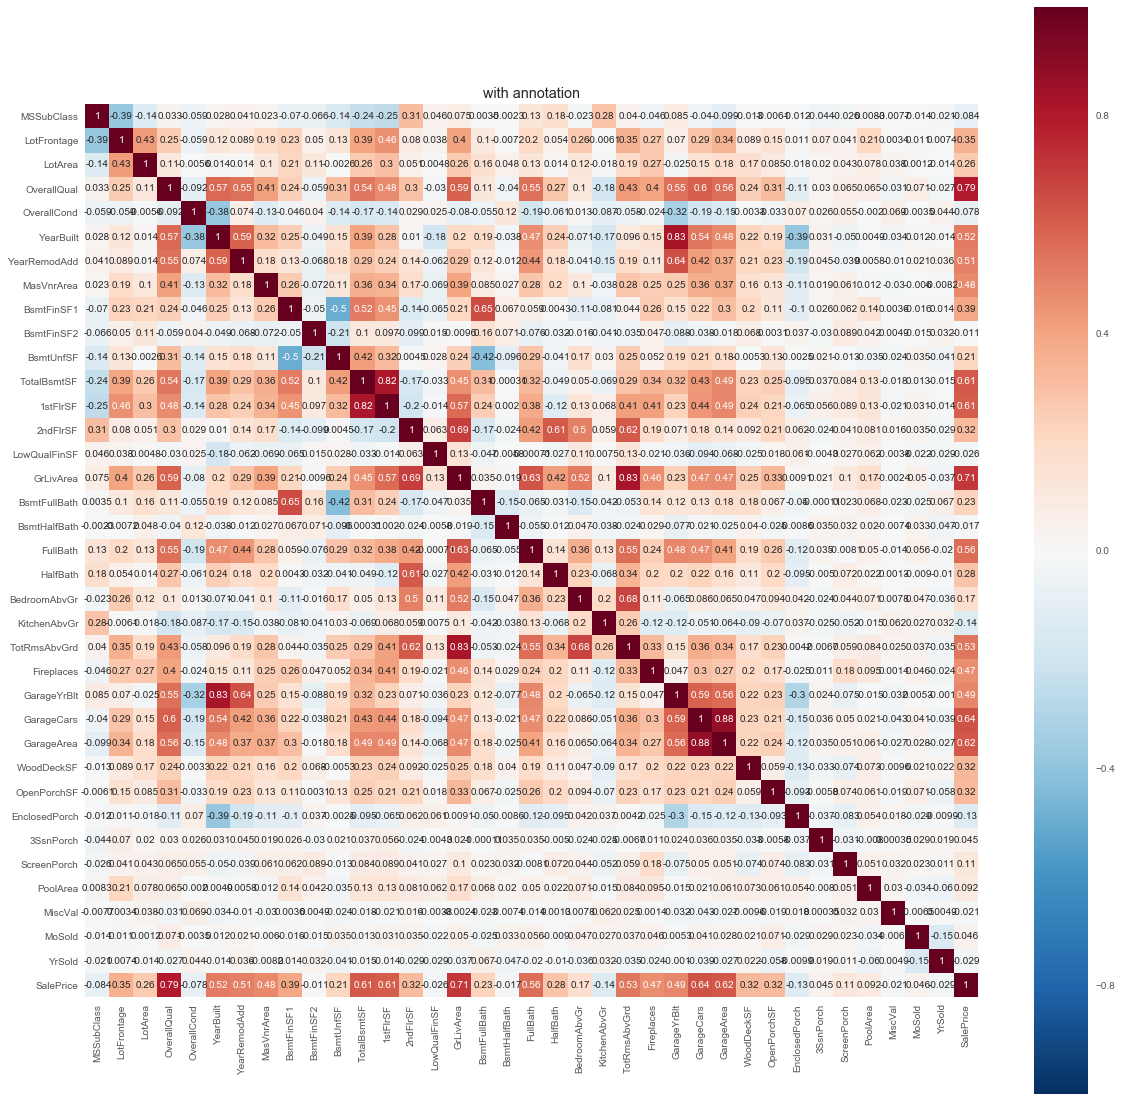

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, vmax=1, square=True,annot=True)
plt.title('with annotation')

In [15]:
top = corr['SalePrice'].sort_values(ascending=False)[:7].index
top

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF'],
      dtype='object')

**Important features**

- OverallQual
- GrLivArea
- GarageCars
- GarageArea
- TotalBsmtSF
- 1stFlrSF 

more likely have an influence on the SalePrice 

### sns.pairplot

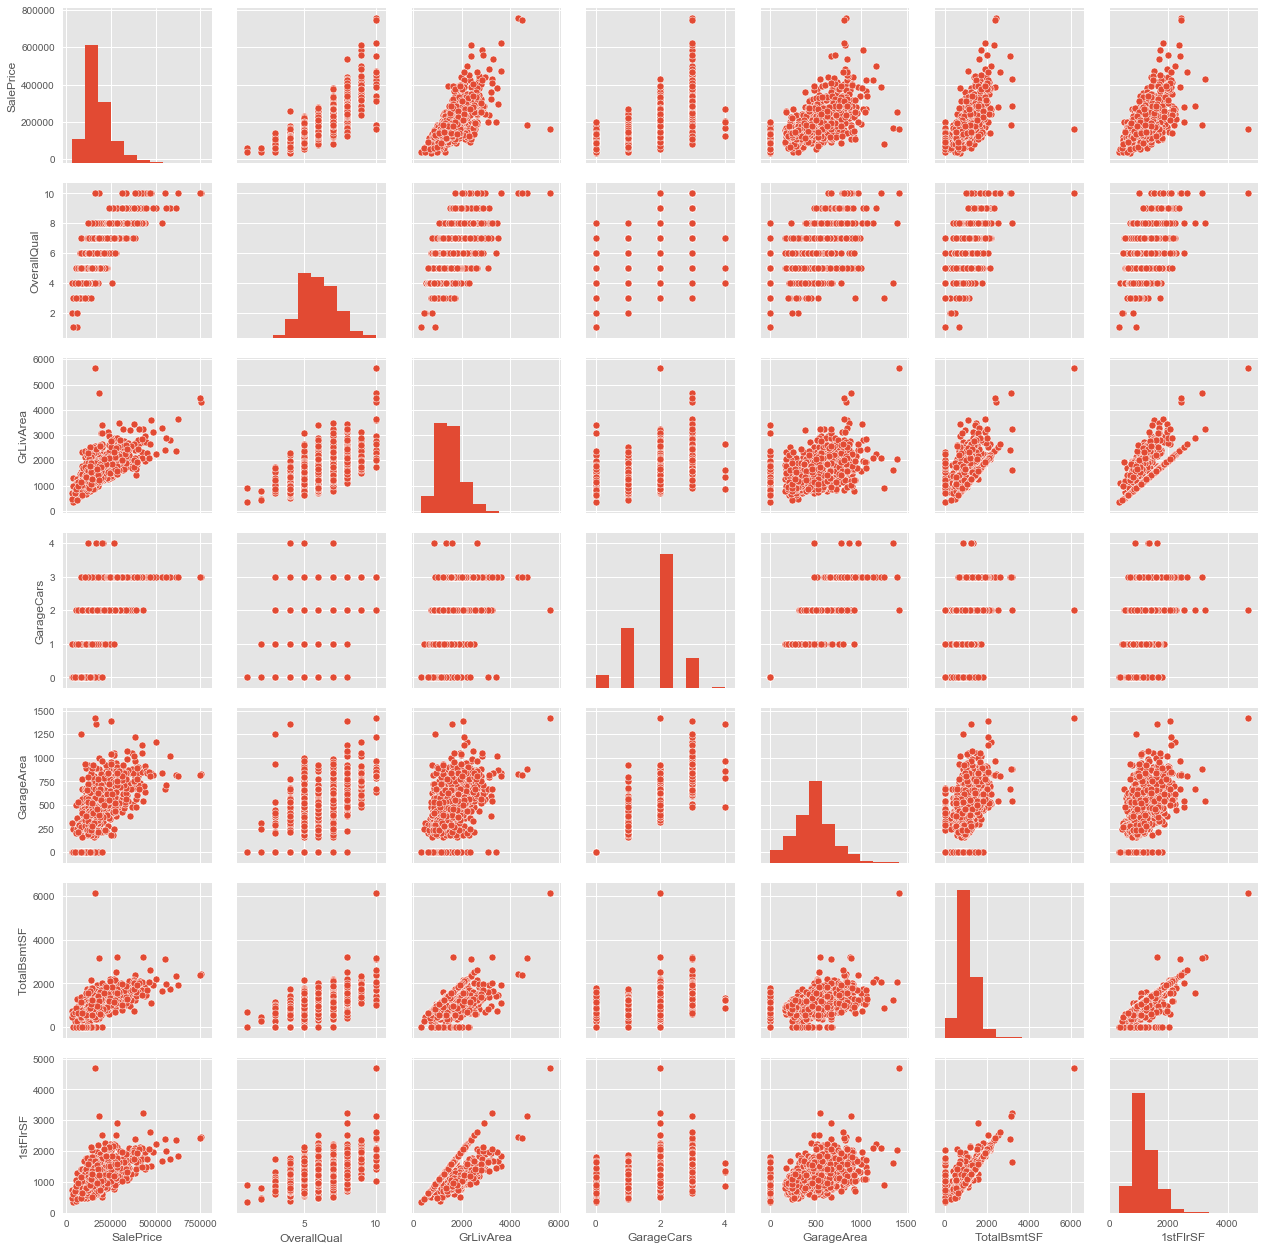

In [17]:
sns.pairplot(numtrain[top])

## 03. Visulaization

### OveralQual

Here, I want to use *pivot_table*. This seems to be similar with *groupby* but, the result format is **Table**.

In [18]:
train.OverallQual.unique()
quality_pivot = train.pivot_table(index='OverallQual',values='SalePrice',aggfunc=np.median)
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


Note that this is the same result with this: **pd.DataFrame(train.groupby('OverallQual').median()['SalePrice'])**

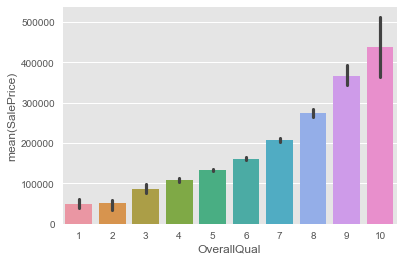

In [19]:
sns.barplot(x='OverallQual',y='SalePrice',data=train)

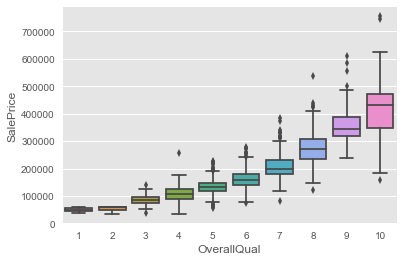

In [20]:
sns.boxplot(x='OverallQual',y='SalePrice',data=train)

sns.barplot is almost similar to sns.boxplot, but the boxplot seems helpful to show more detail quantities while the barplot seems simple and concise.  `Which one do you prefer?`

### GrLivArea

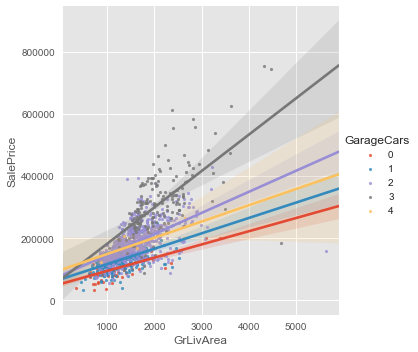

In [23]:
plt.figure(figsize=(8,8))
sns.lmplot(x='GrLivArea',y='SalePrice',data=train,hue='GarageCars',scatter_kws={"s": 10}) 

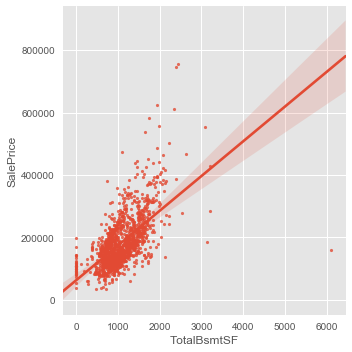

In [24]:
sns.lmplot(x='TotalBsmtSF',y='SalePrice',data=train,scatter_kws={"s": 10})

### GarageCars

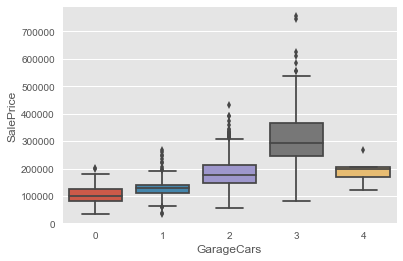

In [25]:
sns.boxplot(x='GarageCars',y='SalePrice',data=train)

### Garage Area

Let's use `cut` task.

In [26]:
train['GarageAreaBand'] = pd.cut(train['GarageArea'], 10)
train[['GarageAreaBand', 'SalePrice']].groupby(['GarageAreaBand'], as_index=False).mean()

,GarageAreaBand,SalePrice
0,"(-1.418, 141.8]",103317.283951
1,"(141.8, 283.6]",127791.167665
2,"(283.6, 425.4]",142471.187713
3,"(425.4, 567.2]",181458.000000
4,"(567.2, 709.0]",206219.825000
5,"(709.0, 850.8]",301592.971698
6,"(850.8, 992.6]",271184.614035
7,"(992.6, 1134.4]",349379.700000
8,"(1134.4, 1276.2]",322612.333333
9,"(1276.2, 1418.0]",193764.333333


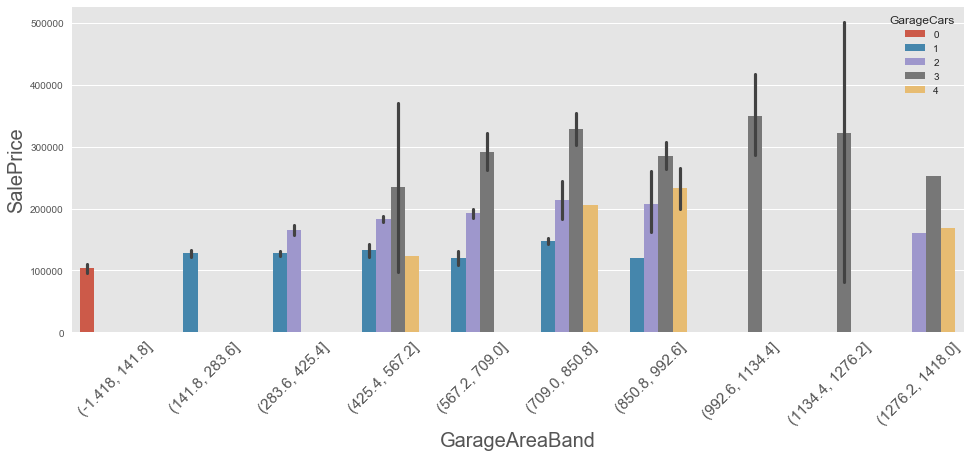

In [35]:
plt.figure(figsize=(16,6))
sns.barplot(x='GarageAreaBand',y='SalePrice',data=train,hue='GarageCars')
plt.xticks(fontsize=15,rotation=45)  
plt.xlabel('GarageAreaBand',fontsize=20)
plt.ylabel('SalePrice',fontsize=20)

I would better to remove Garage Cars or Garage Area. Garage Cars might be better to be deleted out of two features.

### TotalBsmtSFBand

In [36]:
train['TotalBsmtSFBand'] = pd.cut(train['TotalBsmtSF'], 10)
train[['TotalBsmtSFBand', 'SalePrice']].groupby(['TotalBsmtSFBand'], as_index=False).mean()

,TotalBsmtSFBand,SalePrice
0,"(-6.11, 611.0]",116664.450820
1,"(611.0, 1222.0]",158489.897351
2,"(1222.0, 1833.0]",228029.667560
3,"(1833.0, 2444.0]",363590.769231
4,"(2444.0, 3055.0]",372250.000000
5,"(3055.0, 3666.0]",363437.500000
6,"(3666.0, 4277.0]",NaN
7,"(4277.0, 4888.0]",NaN
8,"(4888.0, 5499.0]",NaN
9,"(5499.0, 6110.0]",160000.000000


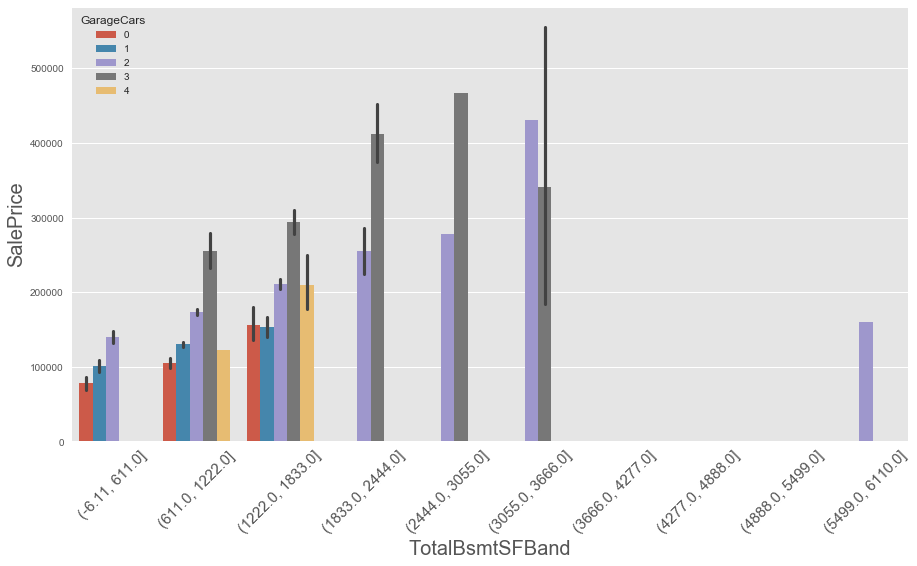

In [37]:
plt.figure(figsize=(15,8))
sns.barplot(x='TotalBsmtSFBand',y='SalePrice',data=train,hue='GarageCars')
plt.xticks(fontsize=15,rotation=45)  
plt.xlabel('TotalBsmtSFBand', fontsize=20)
plt.ylabel('SalePrice', fontsize=20)

### 1stFirSF

In [40]:
train['1stFlrSF'] = pd.cut(train['1stFlrSF'], 10)
train[['1stFlrSF', 'SalePrice']].groupby(['1stFlrSF'], as_index=False).mean()

,1stFlrSF,SalePrice
0,"(329.642, 769.8]",127206.133333
1,"(769.8, 1205.6]",155581.442177
2,"(1205.6, 1641.4]",204399.971429
3,"(1641.4, 2077.2]",274720.197279
4,"(2077.2, 2513.0]",367563.904762
5,"(2513.0, 2948.8]",308031.000000
6,"(2948.8, 3384.6]",307375.000000
7,"(3384.6, 3820.4]",NaN
8,"(3820.4, 4256.2]",NaN
9,"(4256.2, 4692.0]",160000.000000


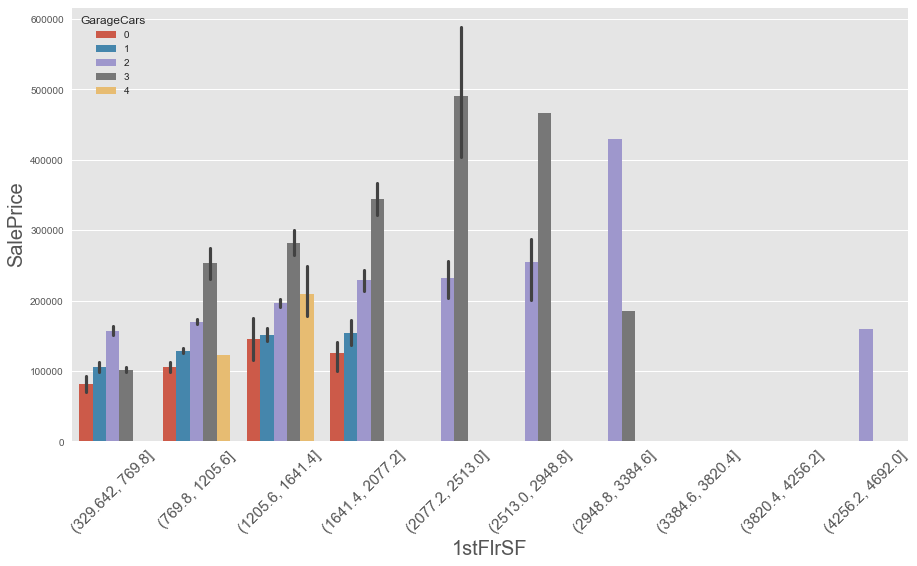

In [41]:
plt.figure(figsize=(15,8))
sns.barplot(x='1stFlrSF',y='SalePrice',data=train,hue='GarageCars')
plt.xticks(fontsize=15,rotation=45)  
plt.xlabel('1stFlrSF', fontsize=20)
plt.ylabel('SalePrice', fontsize=20)

## 04. Missing Values

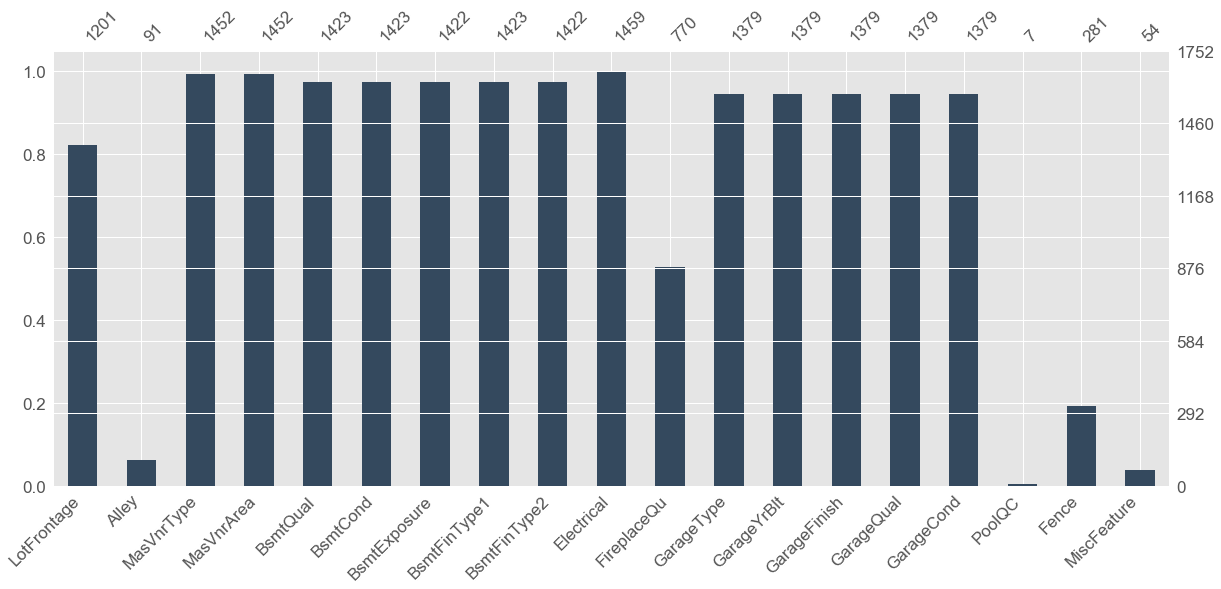

In [42]:
import missingno as msno
missingValueColumns = train.columns[train.isnull().any()].tolist()
msno.bar(train[missingValueColumns],\
            figsize=(20,8),color="#34495e",fontsize=17,labels=True,)

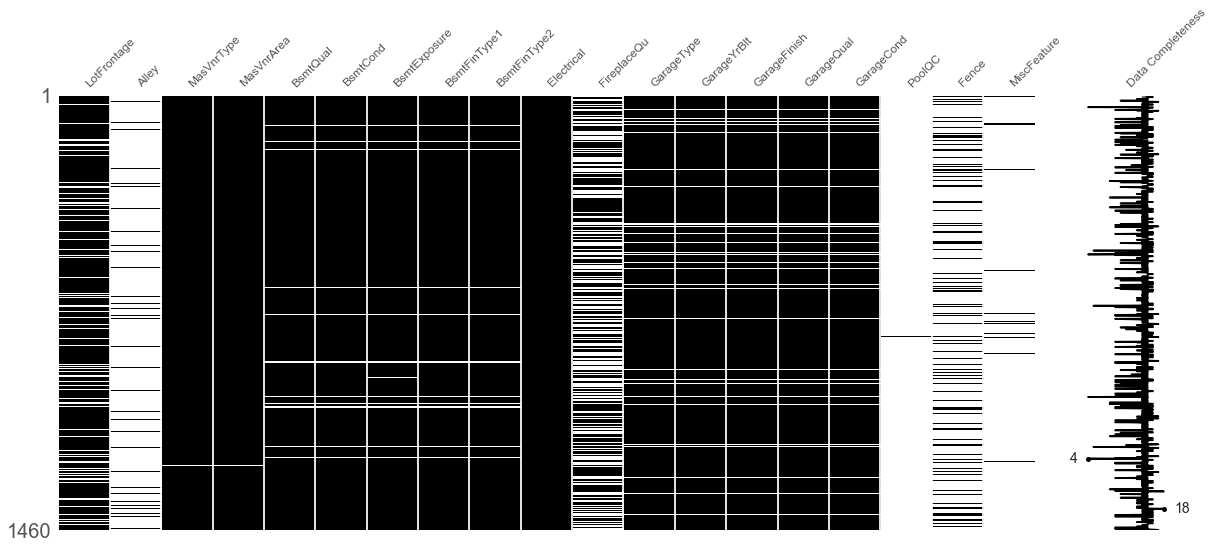

In [43]:
msno.matrix(train[missingValueColumns],width_ratios=(10,1),\
            figsize=(20,8),color=(0,0, 0),fontsize=12,sparkline=True,labels=True)

Two representative ways

* dropna : drop the rows with missing values

* fillna : substitute the median values of each column

In [44]:
train.isnull().sum().sort_values(ascending=False).head()

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
dtype: int64

In [49]:
data = numtrain[top].select_dtypes(include=[np.number]).dropna()
data.shape

(1460, 7)

In [51]:
data.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF
0,208500,7,1710,2,548,856,856
1,181500,6,1262,2,460,1262,1262
2,223500,7,1786,2,608,920,920
3,140000,7,1717,3,642,756,961
4,250000,8,2198,3,836,1145,1145


## 05. Machine Learning Model

In [59]:
y = np.log(data.SalePrice)
X = data.drop(['SalePrice'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [60]:
X_train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF
615,6,1054,2,480,936,1054
613,5,1120,0,0,1120,1120
1303,7,1616,3,834,1616,1616
486,5,1073,2,515,1073,1073
561,5,1389,2,418,1389,1389


### Let's apply Linear Regression Model.

In [62]:
model_lr = linear_model.LinearRegression()
model_lr.fit(X_train, Y_train)
Y_pred = model_lr.predict(X_test)
model_lr.score(X_train, Y_train)

0.77880658501920086

## Conclusion

The accuracy from the Linear regression Model is around 77%, which is pretty good. We can, furthermore, try to apply the other models like SVM, random forest, which might enhance the accuracy. 